### Sistema de Recomendación
Calcular el valor del interrogante creando la matriz user-item

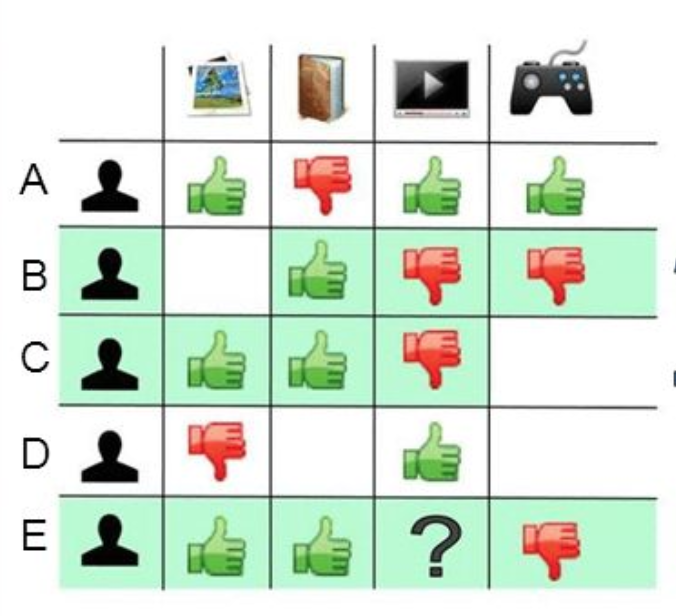

In [1]:
# 1.- Importar librerías:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# 2.- Creamos el dataset de transacciones (en este caso son likes o dislikes)
df = pd.DataFrame({"date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05", "2023-01-06", "2023-01-07", "2023-01-08",
        "2023-01-09", "2023-01-10", "2023-01-11", "2023-01-12", "2023-01-13", "2023-01-14", "2023-01-15"],
                    "userId": ["A", "A", "B", "C", "C", "D", "E", "E", "A", "B", "C", "D", "A", "B", "E"],
                    "item": ["picture", "book", "book", "picture", "book", "picture", "picture", "book", "video", "video", "video",
        "video", "game", "game", "game"],
                    "like": [1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1]})
df

,date,userId,item,like
0,2023-01-01,A,picture,1
1,2023-01-02,A,book,-1
2,2023-01-03,B,book,1
3,2023-01-04,C,picture,1
4,2023-01-05,C,book,1
5,2023-01-06,D,picture,-1
6,2023-01-07,E,picture,1
7,2023-01-08,E,book,1
8,2023-01-09,A,video,1
9,2023-01-10,B,video,-1


In [37]:
# Convertir el dataset de transacciones en una matriz user-item
userItem = df.pivot("userId", "item")["like"]
userItem

item,book,game,picture,video
userId,,,,
A,-1.0,1.0,1.0,1.0
B,1.0,-1.0,NaN,-1.0
C,1.0,NaN,1.0,-1.0
D,NaN,NaN,-1.0,1.0
E,1.0,-1.0,1.0,NaN


In [38]:
# Comparar diferencias con un dataset hardcoded
df2 = pd.DataFrame({"userId": ["A", "B", "C", "D", "E"],
                    "picture": [1, 0, 1, -1, 1],
                    "book": [-1, 1, 1, 0, 1],
                    "video": [1, -1, -1, 1, 0],
                    "game": [1, -1, 0, 0, -1]})
df2

,userId,picture,book,video,game
0,A,1,-1,1,1
1,B,0,1,-1,-1
2,C,1,1,-1,0
3,D,-1,0,1,0
4,E,1,1,0,-1


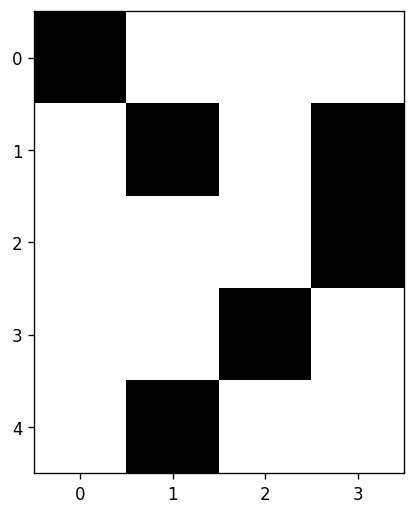

In [39]:
# Visualización de los valores de la matriz
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
# Graficar matriz densa
plt.imshow(userItem, cmap='gray', interpolation='nearest')
plt.show()

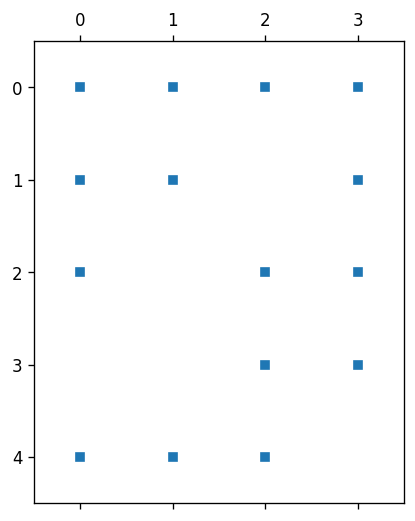

In [40]:
# Visualización de la densidad de la matriz
plt.spy(userItem, markersize=5)
plt.show()


***

In [ ]:
# User-based Collaborative Filtering w/ Sklearn module
# User to User Similarity Matrix
userUser = pd.DataFrame(cosine_similarity(userItem))
userUser


In [ ]:
# Reemplazamos NaNs con ceros (0)
userItemZero = userItem.fillna(0)
userItemZero

item,book,game,picture,video
userId,,,,
A,-1.0,1.0,1.0,1.0
B,1.0,-1.0,0.0,-1.0
C,1.0,0.0,1.0,-1.0
D,0.0,0.0,-1.0,1.0
E,1.0,-1.0,1.0,0.0


In [ ]:
# User to User Similarity Matrix
userUser = pd.DataFrame(cosine_similarity(userItemZero))
userUser

,0,1,2,3,4
0,1.000000,-0.866025,-0.288675,0.000000,-0.288675
1,-0.866025,1.000000,0.666667,-0.408248,0.666667
2,-0.288675,0.666667,1.000000,-0.816497,0.666667
3,0.000000,-0.408248,-0.816497,1.000000,-0.408248
4,-0.288675,0.666667,0.666667,-0.408248,1.000000


Vamos a hacer una recomendación para ek usuario E

¿Cuáles son los usuarios más parecidos al usuario E?

El usuario E es el usuario cuyo índice numérico es 4

Los usuarios 1 y 2 tienen una similitud de 0.6, son los que más se parecen al usuario 4

Por tanto, los usuario B y C son los que tienen un perfil de compra/likes más similar al usuario 4

In [ ]:
# Renombramos los títulos de columnas con los userId de la matriz userItem
userUser.columns = userItem.index
userUser

userId,A,B,C,D,E
0,1.000000,-0.866025,-0.288675,0.000000,-0.288675
1,-0.866025,1.000000,0.666667,-0.408248,0.666667
2,-0.288675,0.666667,1.000000,-0.816497,0.666667
3,0.000000,-0.408248,-0.816497,1.000000,-0.408248
4,-0.288675,0.666667,0.666667,-0.408248,1.000000


In [ ]:
# Creamos índice que también contenga los userId
# userUser["userId"] = userItem.index # primero creamos columna nueva
# userUser = userUser.set_index("userId") # después convertimos columna nueva en índice
userUser.index = userItem.index
userUser


userId,A,B,C,D,E
userId,,,,,
A,1.000000,-0.866025,-0.288675,0.000000,-0.288675
B,-0.866025,1.000000,0.666667,-0.408248,0.666667
C,-0.288675,0.666667,1.000000,-0.816497,0.666667
D,0.000000,-0.408248,-0.816497,1.000000,-0.408248
E,-0.288675,0.666667,0.666667,-0.408248,1.000000


***

## Generando recomendaciones

Queremos calcular una recomendación para el usuario E

In [42]:
userUser["E"]

userId
A   -0.288675
B    0.666667
C    0.666667
D   -0.408248
E    1.000000
Name: E, dtype: float64

Nos dice qué usuarios son más similares al usuario E. Vamos a ordenarlos de más similares a menos:

In [112]:
ranking = userUser["E"].sort_values(ascending = False)
ranking

userId
E    1.000000
B    0.666667
C    0.666667
A   -0.288675
D   -0.408248
Name: E, dtype: float64

In [113]:
type(ranking)

pandas.core.series.Series

In [137]:
similares = ranking[(ranking > 0) & (ranking < 1)]
similares

userId
B    0.666667
C    0.666667
Name: E, dtype: float64

In [148]:
list(similares.index)

['B', 'C']

Vemos que B y C son los usuarios más similares al que estamos recomendando. Obviamente E tiene similaridad 1 consigo mismo.

In [138]:
# Recordemos el aspecto de userItem
userItemZero

item,book,game,picture,video
userId,,,,
A,-1.0,1.0,1.0,1.0
B,1.0,-1.0,0.0,-1.0
C,1.0,0.0,1.0,-1.0
D,0.0,0.0,-1.0,1.0
E,1.0,-1.0,1.0,0.0


In [151]:
# Obtenemos las recomendaciones de los usuarios similares
userItemZero.loc[list(similares.index)]

item,book,game,picture,video
userId,,,,
B,1.0,-1.0,0.0,-1.0
C,1.0,0.0,1.0,-1.0


In [153]:
userItemZero.loc[list(similares.index)].sum()

item
book       2.0
game      -1.0
picture    1.0
video     -2.0
dtype: float64

Por tanto, éstas son las recomendaciones para el usuario E.

Podemos obtener la recomendación para el usuario E en el producto "video", que era el objetivo del ejercicio:

In [154]:
userItemZero.loc[list(similares.index)].sum()["video"]
# Resultado: -2.0 

-2.0

### Resultado: NO se recomienda al usuario E el producto vídeo

# **Basket Analysis**

In [1]:
import pandas as pd
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
df = pd.read_csv(OnlineRetail.csv', parse_dates=['InvoiceDate'], date_parser=dateparse, encoding = 'unicode_escape')
df

<ipython-input-1-f1cb741bf39e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')


In [2]:
df = df.dropna()
df["Description"].sort_values()
df2 = df[:].copy()
g = df2.groupby(by="InvoiceNo").agg(sum)
g

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
536365,40,27.37,124950.0
536366,12,3.70,35700.0
536367,83,58.24,156564.0
536368,15,19.10,52188.0
536369,3,5.95,13047.0
...,...,...,...
C581484,-80995,2.08,16446.0
C581490,-23,2.78,28794.0
C581499,-1,224.69,15498.0


In [4]:
# ¿Cómo agrupar un dataframe de transacciones por la columna InvoiceNo para generar una lista de listas de productos comprados que luego pueda pasar a la librería apriori para hacer un análisis de cesta de la compra?
# Agrupar por la columna InvoiceNo y crear una lista de productos comprados en cada transacción
grouped_df = df2.groupby('InvoiceNo')['Description'].apply(list)
# Convertir el dataframe agrupado en una lista de listas
compras = [list(x) for x in grouped_df.values]
compras

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED ',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET'

In [5]:
# for i in df2.iterrows():
#     InvoiceNo = i[1][0]
#     StockCode = i[1][1]
#     Description = i[1][2]

# # Transformar df["Description"] a lista de listas
# l = df2["Description"].tolist()
# l
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules
from apyori import apriori
# Con el método apriori, se encuentran conjuntos frecuentes de productos
freq_items = apriori(compras, min_support=0.01, use_colnames=True)
type(freq_items)

generator

In [6]:
# Imprimir los conjuntos de elementos frecuentes y las reglas de asociación resultantes
print("Conjuntos Frecuentes:")
for conjunto in freq_items:
    print(conjunto.items)
freq_items = apriori(compras, min_support=0.01, use_colnames=True)
print("\nReglas de Asociación:")
for conjunto in freq_items:
    # print(conjunto)
    for regla in conjunto.ordered_statistics:
        antecedente = list(regla.items_base)
        consecuente = list(regla.items_add)
        confianza = regla.confidence
        lift = regla.lift
        print(f"{antecedente} -> {consecuente}, confianza = {confianza:.2f}, lift = {lift:.2f}")

Conjuntos Frecuentes:
frozenset({'10 COLOUR SPACEBOY PEN'})
frozenset({'12 PENCIL SMALL TUBE WOODLAND'})
frozenset({'12 PENCILS SMALL TUBE RED RETROSPOT'})
frozenset({'12 PENCILS SMALL TUBE SKULL'})
frozenset({'12 PENCILS TALL TUBE RED RETROSPOT'})
frozenset({'15CM CHRISTMAS GLASS BALL 20 LIGHTS'})
frozenset({'3 HEARTS HANGING DECORATION RUSTIC'})
frozenset({'3 HOOK PHOTO SHELF ANTIQUE WHITE'})
frozenset({'3 PIECE SPACEBOY COOKIE CUTTER SET'})
frozenset({'3 STRIPEY MICE FELTCRAFT'})
frozenset({'36 PENCILS TUBE RED RETROSPOT'})
frozenset({'4 TRADITIONAL SPINNING TOPS'})
frozenset({"6 GIFT TAGS 50'S CHRISTMAS "})
frozenset({'6 GIFT TAGS VINTAGE CHRISTMAS '})
frozenset({'6 RIBBONS RUSTIC CHARM'})
frozenset({'60 CAKE CASES DOLLY GIRL DESIGN'})
frozenset({'60 CAKE CASES VINTAGE CHRISTMAS'})
frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'72 SWEETHEART FAIRY CAKE CASES'})
frozenset({'AGED GLASS SILVER T-LIGHT HOLDER'})
frozenset({'AIRLINE BAG VINTAGE TOKYO 78'})
frozenset({'ALARM CLOC

In [7]:
# # Con el método association_rules, se encuentra la confianza y lift de las reglas de asociación para los conjuntos frecuentes
# rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
# # Se pueden filtrar las reglas por lift o por la cantidad de elementos en la antecedente y consecuente
# rules[(rules['lift'] >= 1) & (rules['antecedents'].apply(lambda x: len(x)) >= 2) & (rules['consequents'].apply(lambda x: len(x)) == 1)]
# Ejemplo sencillo
df = pd.DataFrame({"customerID": ["Luis", "José", "María", "Luis", "José", "María", "Luis", "José", "María"]
    , "InvoiceNo": ["Fact001", "Fact002", "Fact003", "Fact001", "Fact002", "Fact003", "Fact001", "Fact002", "Fact003"]
    , "Description": ["Lápiz", "Papel", "Cartón", "Bolígrafo", "Pegatinas", "Grapas", "Regla", "Celo", "Adhesivo"]
    })

# ¿Cómo hacemos para obtener este resultado?
compras = [
    ["Lápiz", "Bolígrafo", "Regla"],
    ["Papel", "Pegatinas", "Celo"],
    ["Cartón", "Grapas", "Adhesivo"],
]
compras

[['Lápiz', 'Bolígrafo', 'Regla'],
 ['Papel', 'Pegatinas', 'Celo'],
 ['Cartón', 'Grapas', 'Adhesivo']]

In [ ]:
# Repaso: Diferencia entre similaridad y correlación 
df = pd.DataFrame({"x": [1, 0, 0]
    , "y": [0, 1, 0]
    , "z": [0, 0, 1]
    })
df

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(df)
cosine_sim

corr = df.corr()
corr

df = pd.DataFrame({"x": [1, 0, 0]
    , "y": [1, 1, 0]
    , "z": [1, 1, 1]
    })
df

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(df)
cosine_sim
corr = df.corr()
corr

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import seaborn as sns
sns.pairplot(df, kind="reg")
plt.show()

df = pd.DataFrame({"x": [1, 2, 3, 4, 5, 6, 7, 8, 9]
    , "y": [2, 3, 4, 5, 6, 7, 8, 9, 10]
    , "z": [3, 4, 5, 6, 7, 8, 9, 10, 11]
    })
df
plt.plot(df)
plt.show()

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(df)
cosine_sim
plt.imshow(cosine_sim)
plt.show()
corr = df.corr()
corr
sns.heatmap(corr, cmap="coolwarm")
plt.show()    
    

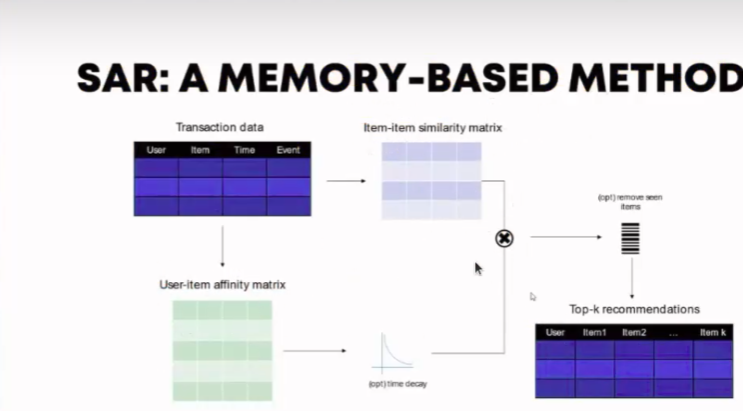

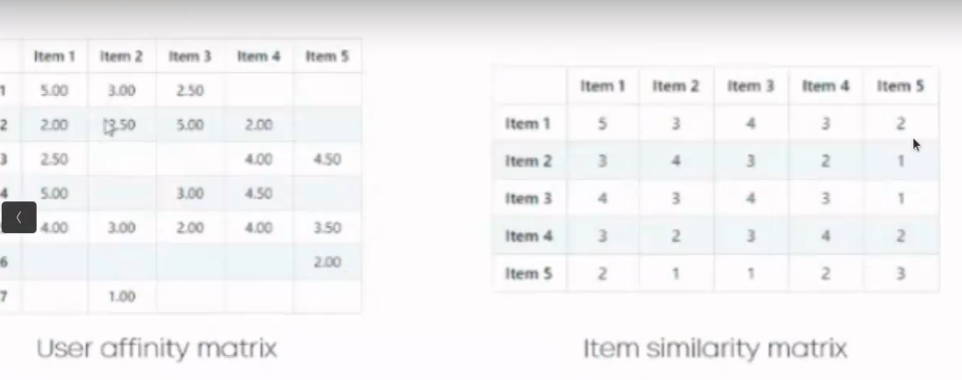

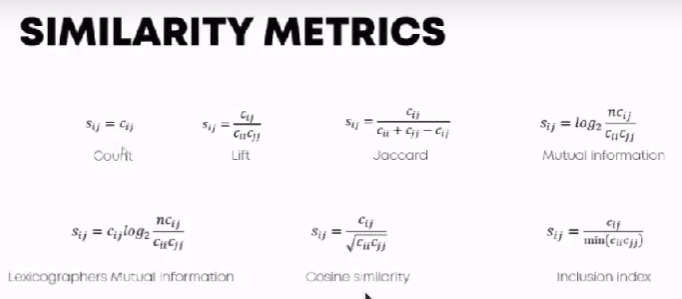